# <font color = 'indianred'>**Import Libraries**

In [12]:
# Importing PyTorch Library for building neural networks
import torch

# Importing PyTorch's neural network module
import torch.nn as nn

# Importing PyTorch's data loading utility
from torch.utils import data

# Importing PyTorch's functional interface for neural network operations
import torch.nn.functional as F

# Importing the random library to generate random dataset
import random

# Importing the math library for mathematical operations
import math

# <font color = 'indianred'>**Lecture Goal**
In this lecture, we will understand PyTorch nn. Module. All the modules in Pytorch are implemented as subclass of the torch.nn.Module class. Pytorch uses these modules to perfrom operations on Tensors. We will first understand some importnat modules and then use these in implementing Linear Regression.

We will first disuss following modules

- nn.Linear()
- nn.MSELoss()
- nn.BCEWithLogitsLoss()
- nn.CrossEntropy()
- Automatic Differentiation with .backwards()
- torch.optim()
- torch.utils.data.DataLoader
- multilabel Classification





# <font color = 'indianred'>**nn.Module**

`nn.Module` is a fundamental base class for all neural network modules in PyTorch, and it serves as a base class for defining your own neural network architectures. Subclassing `nn.Module` is crucial for creating a class that can hold your model's weights, biases, and other learnable parameters.

By subclassing `nn.Module`, you gain access to a variety of helpful attributes and methods, including `.parameters()`. The `.parameters()` method returns an iterator over the model's parameters, which can be used for updating the weights during training.

Subclassing `nn.Module` also makes it easier to work with pre-defined layers, loss functions, and other components that are provided by PyTorch. By organizing your model in this way, you can create a reusable and modular architecture that can be easily adapted to different tasks and datasets.

In [13]:
class LinearRegression(nn.Module):
    """
    A linear regression model that predicts a real-valued output based on a real-valued input.
    """

    def __init__(self, input_dim, output_dim):
        """
        Initializes the LinearRegression model.

        Args:
            input_dim (int): The dimensionality of the input feature vector.
            output_dim (int): The dimensionality of the output feature vector.
        """
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.weights = nn.Parameter(torch.randn(self.output_dim, self.input_dim) / math.sqrt(self.input_dim))
        self.biases = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        """
        Computes the forward pass of the LinearRegression model.

        Args:
            x (torch.Tensor): The input feature vector.

        Returns:
            torch.Tensor: The predicted output value.
        """
        return x @ self.weights.T + self.biases


- The `LinearRegression` class is a subclass of nn.Module in PyTorch and represents a linear regression model that predicts a real-valued output based on a real-valued input.

- The `__init__` method is the constructor for the class, which takes two arguments: `input_dim` and `output_dim`. These arguments represent the dimensions of the input and output feature vectors, respectively. The method initializes the parameters for the linear regression model, including `weights` and `biases`, which are stored as `nn.Parameter` objects. The weights are initialized using a Gaussian distribution with a mean of 0 and a standard deviation of `1/sqrt(2)` to improve the stability of the training process.

- The `forward` method computes the forward pass of the linear regression model, given an input feature vector x. The method returns the predicted output value, which is computed as the dot product of x and the model's weights, plus the model's biases. The weights and biases are learnable parameters of the model, which are optimized during the training process.

- `nn.Module` objects are used as if they are functions (i.e they are callable), but behind the scenes Pytorch will call the forward method automatically.


Together, these methods define a linear regression model that can be used for a variety of regression tasks. By subclassing nn.Module, we gain access to a variety of helpful methods and attributes that make it easier to work with PyTorch's autograd system and perform backpropagation to update the model's parameters during training.


In [14]:
x = torch.arange(6).view(3, 2).float()

# Input Dimension
input_dim = 2

# Output Dimension
output_dim = 1

# Since we're now using an object instead of just using a function, we
# first have to instantiate our model

model = LinearRegression(input_dim, output_dim)

# Get the output of linear layer after transformation
output = model(x)

print('input_tensor shape :', x.shape)
print('output_tensor shape: ', output.shape)

input_tensor shape : torch.Size([3, 2])
output_tensor shape:  torch.Size([3, 1])


In [15]:
model.weights

Parameter containing:
tensor([[ 0.1204, -1.5052]], requires_grad=True)

In [16]:
model.biases

Parameter containing:
tensor([0.], requires_grad=True)

In [17]:
model.parameters()

<generator object Module.parameters at 0x7fc3cfa42ea0>

In [18]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1204, -1.5052]], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True)]

In [19]:
model.state_dict()

OrderedDict([('weights', tensor([[ 0.1204, -1.5052]])),
             ('biases', tensor([0.]))])

# <font color = 'indianred'>**Linear Module (nn.Linear)**


Instead of manually defining and
initializing parameter (weights and biases), and calculating `x @ self.weights.T + self.biases`, we can use the Pytorch class `nn.Linear`for a
linear layer, which does all that for us.

This layer takes in dimensions of input and output features and applies the following transformation to the input tensor $x$

$y = x w^T + b$ ,
$w$ and $b$ are the parameters.

The syntax for Linear Module is  :
`torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)`

- in_features – size of each input sample
- out_features – size of each output sample

Shapes :

Input: $(N, *, H_{in})$ <br>

here ,  $H_{in} = in\_features$, ∗ means any number of additional dimensions and N is the batch size (number of observations). <br><br>

Output: $(N ,*,  H_{out})$,
where all but the last dimension are the same shape as the input and $H_{out} = out\_features$,


Example :
  - if input has shape(3, 2) (batch size is 3 and there are two features)
  and output = nn.Linear(in_features = 2, out_features =1)
  - then output will have the shape (3, 1) (3 observations and 1 feature).


In [20]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.linear_layer = nn.Linear(input_dim, output_dim)


    def forward(self, x):
        return self.linear_layer(x)

In [21]:
x = torch.arange(6).view(3, 2).float()

# Input Dimension
input_dim = 2

# Output Dimension
output_dim = 1

# Initialize first linear layer
model = LinearRegression(input_dim, output_dim)

# Get the output of linear layer after transformation
output = model(x)

print('input_tensor shape :', x.shape)
print('output_tensor shape: ', output.shape)

input_tensor shape : torch.Size([3, 2])
output_tensor shape:  torch.Size([3, 1])


We have not specified any initial weights or bias values.  Linear module automatically initializes the weights randomly using LeCun initialization.  LeCun Initialization initializes weights using  $N(0, \frac{1}{n_{in}})$


In [22]:
# We can get all the parameters associated with model(linear layer) as follows
for name, param in  model.named_parameters():
  print(name, param)

linear_layer.weight Parameter containing:
tensor([[0.3514, 0.5620]], requires_grad=True)
linear_layer.bias Parameter containing:
tensor([0.4246], requires_grad=True)


In [23]:
print('We can see that PyTorch initializes  weights  in the background\n')
print('W:', model.linear_layer.weight)
print('b:', model.linear_layer.bias)
print('Shape of W :', model.linear_layer.weight.data.shape)
print('Shape of b:', model.linear_layer.bias.data.shape)

We can see that PyTorch initializes  weights  in the background

W: Parameter containing:
tensor([[0.3514, 0.5620]], requires_grad=True)
b: Parameter containing:
tensor([0.4246], requires_grad=True)
Shape of W : torch.Size([1, 2])
Shape of b: torch.Size([1])


## <font color = 'indianred'>**Summary Linear Layer:**

- When we initializes the layer (`layer = nn.Linear(input_dim, output_dim)`), Linear module takes the input and output dimensions as parameters, and automatically initializes the weights randomly.

  - PyTorch sets the attribute requires_grad = True for weights and biases.
  - Shape of weights is [out_features, in_features]
  - Shape of bias is [out_features]

- We can then apply this layer to inputs to get our output `(output = layer(input)`
  - It then uses randomly initilaized weights and biases to transform inputs.

  - Shape of input = [batch_size, in_features]
  - output = input (W.T) + b
  - shape of output = [batch_size, out_features]

<img src ="https://drive.google.com/uc?export=view&id=1eLii2_6vPaQAhX1Nm_0TBTwaLCeMun_8" width =700 >



In the example above, the **output layer** would be `nn.Linear(2, 1)`. In the figure above, we have assumed a batch size of 1.


# <font color = 'indianred'>**Mean Squared Error Loss (nn.MSELoss())**

PyTorch implements many common loss functions including `MSELoss` and `CrossEntropyLoss`. We will discuss `MSELoss()` in this lecture. We will explore `CrossEntropyLoss` in coming lectures.

Supposedly our input and output is as follows:

`x = [0, 1, 2, 3, 4]`

`y = [1, 3, 5, 7, 9]`

But our predicted output comes out with an error with equation `y = 2 * x`

`ypred = [0, 2, 4, 6, 8] `

Mean Squared Error (MSE) = $\frac{\sum_{i=1}^{n} (ypred_i  - y_i)^2} {n}$. Here, n = number of elements.

For the above example, loss = 1.0

Earlier we have written function to implement MSE. We can use nn.MSE() module from pytorch to calculate loss.



In [24]:
# Instantiate Mean Squared Error loss function
def mse_loss(ypred, y):
    """
    Computes the mean squared error loss between predicted and actual labels.

    Args:
        ypred: a tensor of shape (num_examples, 1) containing the predicted labels
        y: a tensor of shape (num_examples, 1) containing the actual labels

    Returns:
        A scalar tensor containing the mean squared error loss
    """
    error = ypred - y
    mean_squared_error = torch.mean(error**2)
    return mean_squared_error

# As a class - This is a higher order function that returns a function
loss_nn = nn.MSELoss(reduction='mean')


# As a function - This is a higher order function that retirns a function
loss_functional = F.mse_loss

# when we specify reduction = 'mean' - this will give us mean sqaured loss
# if reduction = 'sum' - this will give us total squared loss
# reduction = 'mean' is the default

# inputs
x = torch.Tensor([0, 1, 2, 3, 4])
y = torch.Tensor([1, 3, 5, 7, 9])

# output
ypred = 2 * x

# Calculating loss
# Loss function will take in 2 inputs: actual labels and predicted labels.
loss_manual = mse_loss(y, ypred)
loss_nn_module = loss_nn(y, ypred)
loss_functional = loss_functional(y, ypred)
print(loss_manual, loss_nn_module, loss_functional )

tensor(1.) tensor(1.) tensor(1.)


# <font color = 'indianred'>**Understanding Loss functions for Classification**

Loss functions are a crucial component in classification problems, especially in the context of machine learning and deep learning. They measure the discrepancy between the predicted outputs of a model and the actual labels. Here's an overview of two commonly used loss functions for classification: Binary Cross-Entropy Loss and Cross-Entropy Loss.

## 1. Binary Cross-Entropy Loss (Logistic Loss Function)

- **Use Cases:**

>- **Binary Classification**: Typically used in binary classification problems, where each instance is classified into one of two classes.

>- **Multi-Label Classification**: It is also applicable in multi-label classification scenarios, where each instance can be associated with multiple labels (classes) simultaneously. In such cases, the classification task is treated as a series of independent binary classification problems.

- **Functionality**: This loss function measures the performance of a classification model whose output is a probability value between 0 and 1. It quantifies the difference between two probability distributions - the actual label and the predicted probability.

- **Mathematical Expression**:
  $$L = - \frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i)] $$
  where $N$ is the number of observations, $y_i$ is the actual label, and $p_i$ is the predicted probability.

- **In PyTorch**: This is implemented as `nn.BCEWithLogitsLoss()`.

## 2. Cross-Entropy Loss

- **Use Case**:

> - **Multi-Class Classification:** Primarily used for multi-class classification problems, where each instance can belong to one of many possible categories.
> - **Binary Classification:** It can also be used for binary classification. In this scenario, the binary classification problem is treated as a multi-class classification with two classes. It requires the model to have two output units, each representing one class.

- **Functionality**: This loss function is an extension of Binary Cross-Entropy to multiple classes. It compares the model's predicted probabilities with the actual class label and penalizes the probabilities based on the difference from the actual label.

- **Mathematical Expression**:
  $$ L = - \frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{M} y_{ic} \cdot \log(p_{ic}) $$
  where $N$ is the number of observations, $M$ is the number of classes, $y_{ic}$ is a binary indicator (0 or 1) if class label $c$ is the correct classification for observation $i $, and $p_{ic}$ is the predicted probability.

- **In PyTorch**: Implemented as `nn.CrossEntropyLoss()`.



We will next delve into a detailed exploration of PyTorch's nn.BCEWithLogitsLoss() and nn.CrossEntropyLoss() classes, examining their practical applications and implementation specifics in Python programming.



# <font color = 'indianred'>**Loss Functions in PyTorch**

## <font color = 'indianred'>**nn.BCEWithLogitsLoss()** </font>

1. **Input Range**: Accepts raw scores (logits) without any activation function applied. Logits are the unnormalized predictions that do not pass through an activation function.
2. **Target**: Binary labels that are either 0 or 1.
3. **Combined**:  **`nn.BCEWithLogitsLoss()`** seamlessly **integrates sigmoid activation with Binary Cross Entropy loss** in a single function, enhancing numerical stability and computational efficiency. By directly processing the raw logits, the function circumvents the numerical difficulties associated with the sigmoid function's extreme ends. It computes the loss in a way that is robust to the effects of very small or very large logits values, which can be problematic when they're transformed into probabilities near 0 or 1. This consolidated operation not only simplifies the implementation but also ensures a more stable gradient calculation, which is vital for the convergence of binary and multi-label classification models during training.

**Use Case - Binary/MultiLabel Classification**

<table>
<tr>
    <td> <img src="https://drive.google.com/uc?export=view&id=1DT7n0Lmbt1hzUvSH9AS9SSydEvOJEPbE" alt="Image 1" style="width: 200px;"/> </td>
    <td> <img src="https://drive.google.com/uc?export=view&id=1ZK-b23jeMu6Esral-ijJsO4qgbLqKp3X" alt="Image 2" style="width: 200px;"/> </td>
</tr>
</table>



In [26]:
# Import the PyTorch library
import torch
# Import the neural network module from PyTorch
import torch.nn as nn

In [27]:
# Set a manual seed for PyTorch to ensure reproducibility
torch.manual_seed(42)

# Generate a random tensor to simulate input data for the model
input = torch.randn(6).view(3, 2)
print(f'input.shape:{input.shape}\n')

# Create a target tensor representing the ground truth labels for binary classification
# The '.view(3, 1)' reshapes the tensor to have 3 rows and 1 column
target = torch.tensor([1.0, 0., 1.0]).view(3, 1)
print(f'target.shape:{target.shape}\n')

# Instantiate a linear model
# The linear layer transforms the input of size 2 to an output of size 1
# This linear model serves as the simplest form of a neural network without any activation function
model = nn.Linear(2, 1)

# Pass the input tensor through the model to get the raw output logits
output = model(input)
print(f'output:{output}\n')

# Initialize the BCEWithLogitsLoss function
# This loss function combines a sigmoid layer with the binary cross-entropy loss in a single class
loss_fn = nn.BCEWithLogitsLoss()

# Compute the loss by comparing the output logits from the model with the target labels
loss = loss_fn(output, target)
print(f'loss:{loss}')


input.shape:torch.Size([3, 2])

target.shape:torch.Size([3, 1])

output:tensor([[ 0.5292],
        [ 0.4855],
        [-0.2635]], grad_fn=<AddmmBackward0>)

loss:0.7539259791374207


**Code Explanations:**

- The `input` tensor is created with randomly generated numbers using `torch.randn`. The tensor is then reshaped to a size of $(3 \times 2)$, which is suitable for a batch of three examples with two features each.

- The `target` tensor is manually specified with the ground truth binary labels for these examples. It is reshaped to align with the output of the model, which will have one output per example.

- A simple linear model is defined using `nn.Linear`. This model acts as a function to map the 2-dimensional input to a 1-dimensional output (a single score per example), which is common for binary classification tasks.

- The `output` of the model is the raw scores (logits) obtained by passing the `input` through the `model`. No activation function is applied yet, which is appropriate since `nn.BCEWithLogitsLoss` expects logits.

- `loss_fn` is an instance of `nn.BCEWithLogitsLoss`, which is a loss function suitable for binary classification problems with logits as inputs. This function will apply the sigmoid activation internally.

- The `loss` is calculated by comparing the `output` logits with the `target` labels using the `loss_fn`. This value represents the model's performance; the lower the loss, the better the model's predictions align with the actual labels. The print statement displays the loss value.

This code effectively demonstrates the creation of a simple binary classification model and the computation of the loss using PyTorch, which can then be used to update the model parameters during the training process.

## <font color = 'indianred'>**nn.CrossEntropy()**</font>

1. **Input**: This function takes in raw scores (logits) from the neural network's output layer. The logits are the unnormalized scores that the network believes correspond to each class, and there is no need for a preceding activation function such as softmax.

2. **Target**: The expected target is a tensor of class indices. The classes are represented as integers, where each integer corresponds to a specific class. This differs from `nn.BCEWithLogitsLoss`, which expects targets in the form of probability distributions (i.e., 0s and 1s).

3. **Combined**: `nn.CrossEntropyLoss()` **combines a softmax operation with Cross-Entropy loss** into a single, more numerically stable computation. This function takes the logits and internally applies softmax to convert them into probabilities before calculating the Cross-Entropy loss. The advantage of this approach is the avoidance of numerical issues such as underflow and overflow, which can occur when dealing with extreme values of input logits or when working with very small numbers. This integrated approach is particularly beneficial in high-dimensional data settings, ensuring that the computed probabilities are handled in a numerically stable manner, even when they are very close to 0 or 1.

**Use Case - Binary/MultiClass Classification**

<table>
<tr>
    <td> <img src="https://drive.google.com/uc?export=view&id=1DVSgL5tEvWRYt4XhlqwEEAhu8FOqt9wK"  style="width: 200px;"/> </td>     
    <td> <img src="https://drive.google.com/uc?export=view&id=1a8ecYjElSUawDcRpD4ZckacenRCzmfav" style="width: 200px;"/> </td>

</tr>
</table>











In [28]:
# Set a manual seed for PyTorch to ensure reproducibility
torch.manual_seed(42)

# Generate a random tensor to simulate input data for the model, reshaped to a size of 3 batches with 2 features each
input = torch.randn(6).view(3, 2)
print(f'input.shape:{input.shape}\n')

# Create a tensor representing the ground truth class labels for each input, converted to long data type as required by nn.CrossEntropyLoss
target = torch.tensor([1.0, 0., 1.0]).long()
print(f'target.shape:{target.shape}\n')

# Instantiate a model with a linear layer, which is essentially a fully connected layer without an activation function
# The linear layer transforms the 2-dimensional input to a 2-dimensional output, where each dimension corresponds to a class score
model = nn.Linear(2, 2)

# Pass the input tensor through the model to obtain the raw class scores (logits)
output = model(input)
print(f'output:{output}\n')

# Initialize the CrossEntropyLoss function, which combines softmax and cross-entropy loss in a single operation
loss_fn = nn.CrossEntropyLoss()

# Compute the loss by comparing the logits from the model with the target labels
# nn.CrossEntropyLoss expects class indices as targets, hence the conversion of target to long data type
loss = loss_fn(output, target)
print(f'loss:{loss}')


input.shape:torch.Size([3, 2])

target.shape:torch.Size([3])

output:tensor([[ 0.7333,  0.2065],
        [ 0.6896,  0.1615],
        [-0.0593, -0.2597]], grad_fn=<AddmmBackward0>)

loss:0.7509231567382812


## <font color = 'indianred'>**Summary Loss Functions**

|                              | `nn.BCEWithLogitsLoss()`     | `nn.CrossEntropy()`      |
|------------------------------|--------------------------|-------------------------|
| Classification               | binary/multilabel                   | binary/multiclass              |
| Input (each datapoint)       | logit                    | array of logits         |
| Label (Each data point)      | float (0.0 or 1.0)       | long (class index)      |

**Note:**  

- **nn.CrossEntropyLoss() Labels:** When using nn.CrossEntropyLoss(), the labels should be provided as integers (long format, e.g., 1, 2, 3, ...). One-hot encoding is not required as this loss function internally performs the necessary conversion.

- **No Activation in Output Layer:** For both nn.BCEWithLogitsLoss() and nn.CrossEntropyLoss(), it is not necessary to apply an activation function (such as sigmoid for binary or softmax for multi-class) to the output layer of the model. These activation functions are inherently integrated within the respective loss functions, ensuring a numerically stable calculation that combines both the activation and the loss computation in a single step.


# <font color = 'indianred'>**Automatic Differentiation**

Calculating gradients for large, complex functions in neural network layers can be a challenging task. Fortunately, PyTorch's AutoGrad feature can help by enabling us to calculate gradients for high-dimensional curves with just a few lines of code.



In [29]:
# Initializing tensors
w = torch.tensor([2.0])
b = torch.tensor([0.0] )
x = torch.tensor([1.0] )
y = torch.tensor([1.0] )
print(f' w: {w}\n b: {b}\n x: {x}\n y: {y}')

 w: tensor([2.])
 b: tensor([0.])
 x: tensor([1.])
 y: tensor([1.])


let us define a function :  
$L = -(y*log(sigmoid(w*x + b)) + (1-y) * log(1-sigmoid(w*x + b)))$ <br>

We want to determine how the Loss changes with respect to the variable $w$, or in other words, calculate the partial derivative $\dfrac{\partial L}{\partial w}$. In order to compute the gradient, we must first set w.requires_grad_ to True and b_requires_grad_ to True.

$u = w * x$ <br>
$z = u + b$  <br>
$a = sigmoid(z)$ <br>
$L = BinaryCrossEntropy(a,y)$

In [30]:
w.requires_grad_(True)
b.requires_grad_(True)
print(f' w: {w}\n b: {b}')

 w: tensor([2.], requires_grad=True)
 b: tensor([0.], requires_grad=True)


In [31]:
import torch.nn.functional as F
L = F.binary_cross_entropy(torch.sigmoid(w*x + b), y)

print(L)

tensor(0.1269, grad_fn=<BinaryCrossEntropyBackward0>)


## <font color = 'indianred'>**Check Gradients Manually**

In [32]:
w = torch.tensor(2.0)
b = torch.tensor(0.0)
x = torch.tensor(1.0)
y = torch.tensor(1.0)
L1 = F.binary_cross_entropy(torch.sigmoid(w*x + b), y)

h = 0.001
b1 = b + h
w1 = w + h
L2 = F.binary_cross_entropy(torch.sigmoid(w*x + b1), y)
L3 = F.binary_cross_entropy(torch.sigmoid(w1*x + b), y)

grad_b = (L2-L1)/h
grad_w = (L3-L1)/h

print(grad_w, grad_b)

tensor(-0.1192) tensor(-0.1192)


## <font color = 'indianred'>**Use backward() method to calculate gardients**

In [33]:
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)
x = torch.tensor(1.0)
y = torch.tensor(1.0)

# forward pass
L = F.binary_cross_entropy(torch.sigmoid(w*x + b), y)

In [34]:
# DO NOT RUN THIS CELL TWICE
# Using Pytorch Autograd
# For this we will use the method backward() on the output
# backward pass to calculate gradients
L.backward()

<font color = 'indianred' size = 5>After passing the .backward() function on output. We can retrive the gradient with respect to any parameter using .grad attribute</font>

<font color = 'indianred' size = 5>$\dfrac{\partial L}{\partial b}  = b.grad$ </font> <br><br>
<font color = 'indianred' size = 5>$\dfrac{\partial L}{\partial w}  = w.grad$ </font>

In [35]:
print('gradients using pytorch autodiff function \n')
print(f'gradient with respect to l  : {w.grad}')
print(f'gradient with respect to a  : {b.grad}')

gradients using pytorch autodiff function 

gradient with respect to l  : -0.11920296400785446
gradient with respect to a  : -0.11920296400785446


## <font color = 'indianred'>**Calling backward() again**


Earlier we said that we should not run the .backward() function twice. Let use see what happens if we do that.

In [36]:
# backward pass to calculate gradients
L.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

As we can see from thr error message above, call to backward will free up implicit computation graph. If we call it the second time it will give us an error.

## <font color = 'indianred'>**Gradient Accumulation**</font>

Above we called the backward() twice and got an error. Now let us see what happens if we call the forward first (to reconstruct the graph) and then call the backward inside a for loop.

In [37]:
for i in range(3):
  # forward pass - construct the graph
  L = F.binary_cross_entropy(torch.sigmoid(w*x + b), y)
  # backward pass to calculate gradients
  L.backward()
  print(f'gradients using pytorch autodiff function for {i+1}th iteration\n')
  print(f'gradient with respect to w  : {w.grad}')
  print(f'gradient with respect to b  : {b.grad}')

gradients using pytorch autodiff function for 1th iteration

gradient with respect to w  : -0.23840592801570892
gradient with respect to b  : -0.23840592801570892
gradients using pytorch autodiff function for 2th iteration

gradient with respect to w  : -0.3576088845729828
gradient with respect to b  : -0.3576088845729828
gradients using pytorch autodiff function for 3th iteration

gradient with respect to w  : -0.47681185603141785
gradient with respect to b  : -0.47681185603141785


When computing gradients using PyTorch's **`backward()`** method, it's important to keep in mind that by default, PyTorch accumulates the gradients for each parameter. This means that the gradients are not reset after each call to **`backward()`**, but instead are added to the existing gradients.

If we call **`backward()`** in a loop, this can lead to the gradients increasing with each iteration, instead of being reset to their original values. To avoid this issue, we can explicitly clear the gradients using the **`zero_()`** method, which sets all the gradients to zero.

Clearing the gradients is particularly important when training large neural network models, as the accumulated gradients can quickly become very large and lead to numerical instability or slow convergence.

In [38]:
for i in range(3):

  L = F.binary_cross_entropy(torch.sigmoid(w*x + b), y)
  # backward pass to calculate gradients
  w.grad.zero_()
  b.grad.zero_()
  L.backward()

  # update weights
  print(f'\ngradients using pytorch autodiff function for {i+1}th iteration')
  print(f'gradient with respect to a  : {w.grad}')
  print(f'gradient with respect to a  : {b.grad}')


gradients using pytorch autodiff function for 1th iteration
gradient with respect to a  : -0.11920296400785446
gradient with respect to a  : -0.11920296400785446

gradients using pytorch autodiff function for 2th iteration
gradient with respect to a  : -0.11920296400785446
gradient with respect to a  : -0.11920296400785446

gradients using pytorch autodiff function for 3th iteration
gradient with respect to a  : -0.11920296400785446
gradient with respect to a  : -0.11920296400785446


# <font color = 'indianred'>**torch.optim**
We can implement number of gradient-based optimization methods using `torch.optim`. **SGD (Stochastic Gradient Descent)** is the most basic of them and **Adam** is one of the most popular. We will use SGD in this notebook and cover other optimizers in a later lecture.

An optimizer takes the **model parameters** we want to update (learnable parameters), and the **learning rate**  (and some other hyper-parameters as well).

Optimizers do not compute the gradients on their own, we need to call **backward()** on the loss first.

We can then use optimizer's **step()** mehod to update the model parameters.

Further, we do no not need to zero the gradients one by one. We can invoke the optimizer’s **zero_grad()** method.

This does  `zero_()` call on all learnable parametets of the model.

In [39]:
# create a simple model
model = nn.Linear(3, 1)

# create a simple dataset
X = torch.tensor([[1., 3., 4.]])
y = torch.tensor([[2.]])

# create our optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2)

# loss function
criterion = nn.MSELoss()

y_hat = model(X)

print('model params before weight update:', model.weight.data, model.bias.data)

# calculate loss
loss = criterion(y_hat, y)

# reset gradients to zero
optim.zero_grad()

# calculate gradients
loss.backward()

# update weights
optim.step()


print('model params after weight update:', model.weight.data, model.bias.data)


model params before weight update: tensor([[-0.2695,  0.1472, -0.2660]]) tensor([-0.0677])
model params after weight update: tensor([[-0.2103,  0.3248, -0.0292]]) tensor([-0.0085])


# <font color = 'indianred'>**Dataset and Dataloader**

When we train our model, we typically

  - want to process the data in batches
  - reshuffle the data at every epoch to reduce model overfitting,
  - and use Python’s multiprocessing to speed up data retrieval.

Earlier we wrote a function to create an iterator, that will shuffle the data and yield batches of data. However, we can do this much more efficently using **torch.utils.data.DataLoader**, which is an iterator that provides all the above features.

The most important argument of DataLoader constructor is dataset, which is a PyTorch Dataset. Pytorch **Dataset** is a regular **Python class** that inherits from the [**Dataset**](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) class.

If a dataset consists of tensors of lables and features, we can use PyTorch’s [**TensorDataset**](https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset) class to wrap tensors in a Dataset class.

If the **dataset is big** (tens of thousands of image/text files, for instance), loading it at once would not be memory efficient. In that case we will need to create  custom dataset class , that load the files\examples on demand. We will demonstrate how to create a CustomDataset that inherits from PyTorch's Dataset class later.

In [40]:
# Generate Dataset
x = torch.arange(10).view(5, 2)
x = x.type(dtype = torch.float)
w = torch.Tensor([2, 3]).view(-1, 1)
y = x.mm(w) + 1
print(f'x:{x}' )
print(f'\ny: {y}')

x:tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]])

y: tensor([[ 4.],
        [14.],
        [24.],
        [34.],
        [44.]])


In [41]:
# Create Dataset
dataset = data.TensorDataset(x, y)

In [42]:
dataset

In [43]:
dataset[1]

(tensor([2., 3.]), tensor([14.]))

In [44]:
# Create DataLoader
data_iter = data.DataLoader(dataset, batch_size= 2, shuffle= True)

In [45]:
# We can loop over the DataLoader object to get batch of observations

for epoch in range(3):
  print(f'\nEpoch {epoch + 1}\n')
  for i, (x, y) in enumerate(data_iter):
    print(f'Batch Number {i+1}')
    print(f'x:{x}' )
    print(f'y: {y}\n')


Epoch 1

Batch Number 1
x:tensor([[0., 1.],
        [2., 3.]])
y: tensor([[ 4.],
        [14.]])

Batch Number 2
x:tensor([[8., 9.],
        [4., 5.]])
y: tensor([[44.],
        [24.]])

Batch Number 3
x:tensor([[6., 7.]])
y: tensor([[34.]])


Epoch 2

Batch Number 1
x:tensor([[6., 7.],
        [4., 5.]])
y: tensor([[34.],
        [24.]])

Batch Number 2
x:tensor([[0., 1.],
        [2., 3.]])
y: tensor([[ 4.],
        [14.]])

Batch Number 3
x:tensor([[8., 9.]])
y: tensor([[44.]])


Epoch 3

Batch Number 1
x:tensor([[0., 1.],
        [4., 5.]])
y: tensor([[ 4.],
        [24.]])

Batch Number 2
x:tensor([[8., 9.],
        [6., 7.]])
y: tensor([[44.],
        [34.]])

Batch Number 3
x:tensor([[2., 3.]])
y: tensor([[14.]])



We can obseve that in every epoch, an obsetvation is a part of a different batch. This happens as DataLoader shuffles the dataset to create batches.

# <font color = 'indianred'>**Autograd from scratch**

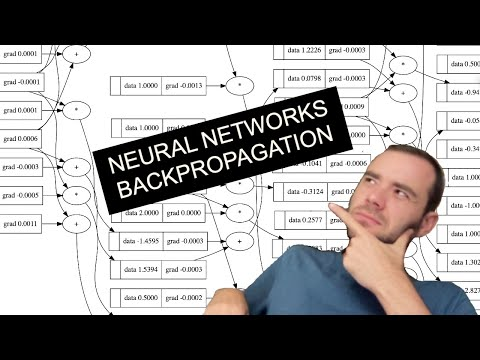

In [46]:
from IPython.display import YouTubeVideo
YouTubeVideo('VMj-3S1tku0')